<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/MORINGA_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KENYA HEALTHCARE FACILITIES ANALYSIS

Good health is central to human happiness and well-being that contributes significantly to prosperity and wealth and even economic progress, as healthy populations are more productive, save more and live longer. In this project, we want to point out counties that are in dire need of attention from the government health sector and any other funding organizations in order to boost the general health care of the population.


# Loading our libraries

In [2]:
# importing pandas
import pandas as pd

# importing numpy 
import numpy as np 

# importing pyplot
from matplotlib import pyplot as plt


# Loading the dataset to our environment

In [3]:
# Loading the healthcare facilities dataset
# url = 'https://africaopendata.org/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download-21102015.xls'

hospitals = pd.read_csv('/content/ehealth.csv')


In [4]:
# Preview the dataset 
hospitals.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,Nearest Town,Beds,Cots,Official Landline,Official Fax,Official Mobile,Official Email,Official Address,Official Alternate No,Town,Post Code,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ANC,ART,BEOC,BLOOD,CAES SEC,CEOC,C-IMCI,EPI,FP,GROWM,HBC,HCT,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,NaN,MANYATTA,Kiriari -market,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,148,NaN,Catherine Njoki Mugo,Nursing Officer in Charge,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,Kariobangi Market,0.0,0.0,020237354,NaN,NaN,stjudes2008@yahoo.com,NaN,NaN,NaN,NaN,Caroline Achieng,Clinical Officer,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,NaN,LAIKIPIA EAST,Nanyuki,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cpt Kiplagat,Medical Superintendant,N,N,Operational,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,NaN,JUJA,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,Gataka Road,KAJIADO NORTH,Ongata Ronga,7.0,0.0,NaN,NaN,0733231565,kanyokanyokltd@gmail.com,P.O Box 15356,NaN,Langata,00509,Jeffrey Mikombi Akide,Clinical Officer,Y,Y,Operational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Loading the number of icubeds per county dataset
url = 'https://data.humdata.org/dataset/e231c2f5-11c6-4006-b0f8-f6cb41410b30/resource/57af4fb4-1141-41aa-a5f8-a92ccd5663c9/download/number-of-icu-beds-per-county.xlsx'

icubeds = pd.read_excel(url)

In [6]:
# Preview icubeds dataset
icubeds.head(0)
#icubeds.isnull().sum()
#np.count_nonzero(icubeds['Unnamed: 3'].isnull())
icubeds.loc[icubeds['Number of Hospital ICU Beds per county'] == 'Bomet']

,Unnamed: 0,Number of Hospital ICU Beds per county,Unnamed: 2,Unnamed: 3
58,NaN,Bomet,Longisa,0
59,NaN,Bomet,Tenwek,NaN


In [7]:
# Loading health staff dataset per 10000 population
url = 'https://open.africa/dataset/4acc4709-cd40-43da-ad95-3b4a1224f97c/resource/43cea114-a929-4984-bd1c-b665d4a7ea5e/download/cfafrica-_-data-team-_-outbreak-_-covid19-_-data-_-openafrica-uploads-_-kenya-healthworkers.csv'

healthworkers = pd.read_csv(url)

In [8]:
#Preview the dataset
healthworkers.tail()
#healthworkers.shape

,County,"Core health workforce per 10,000\rpopulation"
43,Uasin gishu,28.2
44,Vihiga,12.2
45,Wajir,6.1
46,West pokot,9.3
47,Total,15.6


In [9]:
# Loading the population per county dataset
url = 'https://data.humdata.org/dataset/fa58ed8d-1daa-48b6-bae1-19746c32c85f/resource/82f909ce-7358-48da-9639-8fe9c3318251/download/2019-population_census-report-per-county.csv'
population = pd.read_csv(url)

In [10]:
# Preview population dataset
population.head()

,County,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019
0,Baringo,"666,763","336,322","330,428","142,518",5,"10,976",61,"555,561","111,202",13
1,Bomet,"875,689","434,287","441,379","187,641",5,"2,531",346,"724,186","151,503",23
2,Bungoma,"1,670,570","812,146","858,389","358,796",5,"3,024",552,"1,630,934","39,636",35
3,Busia,"893,681","426,252","467,401","198,152",5,"1,696",527,"488,075","405,606",28
4,Elgeyo-Marakwet,"454,480","227,317","227,151","99,861",5,"3,032",150,"369,998","84,482",12


# Getting information about our dataset

In [11]:
# info regarding the hospitals dataset
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            10505 non-null  int64  
 1   Facility Name            10505 non-null  object 
 2   Province                 10505 non-null  object 
 3   County                   10505 non-null  object 
 4   District                 10505 non-null  object 
 5   Division                 10238 non-null  object 
 6   Type                     10505 non-null  object 
 7   Owner                    10505 non-null  object 
 8   Location                 10010 non-null  object 
 9   Sub Location             9613 non-null   object 
 10  Description of Location  5304 non-null   object 
 11  Constituency             10505 non-null  object 
 12  Nearest Town             9903 non-null   object 
 13  Beds                     10418 non-null  float64
 14  Cots                  

The hospitals dataframe has <b>29 columns and 10505 hospitals</b>. <b><i> Division, Location, sub_location, beds, cots, official fax, official mobile, official address, official landline, official alternate no., town, postcode, in charge, job title of incharge, open 24hrs, open weekends, ART, C-IMCI, FP, HBC and IPD</i></b> have null values.<b><i>ANC, BLOOD, BEOC, CAES SEC, CEOC, EPI, GROWM, HCT, OPD, OUTREACH, PMTC, RAD/XRAY, RHTC/RHDC, TB DIAG, TB LABS, TB TREAT and YOUTH</i></b> have no values.

In [12]:
# Info regarding icebeds dataset
icubeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              0 non-null      float64
 1   Number of Hospital ICU Beds per county  100 non-null    object 
 2   Unnamed: 2                              100 non-null    object 
 3   Unnamed: 3                              99 non-null     object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


The icubeds dataframe has 4 columns and 100 entries. <b>unnamed: 3</b> coulmn has one null value.  

In [13]:
# Info regarding healthworkers dataset
healthworkers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County                                       48 non-null     object 
population  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


The healthworkers dataframe has 2 columns and 48 entries. None of the columns have null values.

In [14]:
# Info regarding population dataset
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    47 non-null     object
 1   Total_Population19        47 non-null     object
 2   Male populatio 2019       47 non-null     object
 3   Female population 2019    47 non-null     object
 4   Households                47 non-null     object
 5   Av_HH_Size                47 non-null     int64 
 6   LandArea                  47 non-null     object
 7   Population Density        47 non-null     object
 8   Population in 2009        47 non-null     object
 9   Pop_change                47 non-null     object
 10  Intersex population 2019  47 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 4.2+ KB


The population dataframe has 11 columns and 47 entries representing the 47 counties. There are no missing values in this dataframe.

# DATA PREPARATION

We are first going to drop unnecessary columns in each dataset then merge our dataframes based on similarities.

In [15]:
hospitals.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

In [16]:
population.columns

Index(['County', 'Total_Population19', 'Male populatio 2019',
       'Female population 2019', 'Households', 'Av_HH_Size', 'LandArea',
       'Population Density', 'Population in 2009', 'Pop_change',
       'Intersex population 2019'],
      dtype='object')

In [17]:
icubeds.columns

Index(['Unnamed: 0', 'Number of Hospital ICU Beds per county', 'Unnamed: 2',
       'Unnamed: 3'],
      dtype='object')

In [18]:
# Dropping irrelevant columns

# Create a function to drop tables
def drop_columns(dataframe, columns):
  # Use the drop method on the dataframe to drop a list of columns
  dataframe.drop(columns, axis=1, inplace=True)
  # Return the dataframe without the dropped columns
  return dataframe.head()

hospitals_columns = ['Official Fax', 'Official Mobile', 'Official Address', 'Official Landline', 
                     'Official Alternate No','Official Email', 'Description of Location', 'Town','Post Code', 'In Charge', 
                     'Job Title of in Charge','Division', 'Location', 'Sub Location','ANC', 'BLOOD', 'BEOC', 
                     'CAES SEC', 'CEOC', 'EPI', 'GROWM', 'HCT', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 
                     'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']

population_columns = ['Male populatio 2019','Female population 2019','Households','Av_HH_Size','LandArea', 
                      'Population Density','Population in 2009','Pop_change','Intersex population 2019'] 

icubeds_columns = ['Unnamed: 0', 'Unnamed: 2']
drop_columns(hospitals,hospitals_columns)
drop_columns(population, population_columns)
drop_columns(icubeds, icubeds_columns)




,Number of Hospital ICU Beds per county,Unnamed: 3
0,County,Number of beds
1,Kwale,6
2,Mombasa,12
3,Mombasa,6
4,Mombasa,6


In [19]:
# For the icubeds dataset, we shall also drop the first row
icubeds.drop([0], inplace=True)
icubeds.head()
 
# We shall the group by county and sum number of icubeds
icubeds = icubeds.groupby(['Number of Hospital ICU Beds per county'], as_index=False)[['Unnamed: 3']].sum()
icubeds.head(10)


,Number of Hospital ICU Beds per county,Unnamed: 3
0,Baringo,0
1,Bomet,0
2,Bungoma,23
3,Busia,0
4,Embu,5
5,Garissa,6
6,Homa Bay,0
7,Isiolo,0
8,Kajiado,0
9,Kakamega,9


In [20]:
# drop last column in healthworkers dataset
healthworkers.drop([47], inplace=True)

In [21]:
# make county columns uniform
def combine_lower(value):
  return value.lower().replace(' ','').replace('_','').replace('-','')

hospitals['County'] = hospitals['County'].map(combine_lower)
healthworkers['County'] = healthworkers['County'].map(combine_lower)
population['County'] = population['County'].map(combine_lower)

icubeds['Number of Hospital ICU Beds per county'] = icubeds['Number of Hospital ICU Beds per county'].map(combine_lower)
# merge hospitals dataset with healthworkers dataset by county.
hospitals_healthworkers = hospitals.merge(healthworkers, how= 'left', on = 'County')
hospitals_healthworkers.head(2)


,Facility Code,Facility Name,Province,County,District,Type,Owner,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000\rpopulation"
0,19224,CDF Kiriari Dispensary,Eastern,embu,Manyatta,Dispensary,Ministry of Health,MANYATTA,Kiriari -market,0.0,0.0,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,21.2
1,19310,St Jude's Huruma Community Health Services,Nairobi,nairobi,Mathare,Medical Clinic,Private Practice - Unspecified,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,26.3


In [22]:
# Let us now merge the hospitals_healthworkers dataset with population dataset
hospitals_healthworkers_pop = hospitals_healthworkers.merge(population, how='left', on='County')
hospitals_healthworkers_pop.head(2)

,Facility Code,Facility Name,Province,County,District,Type,Owner,Constituency,Nearest Town,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000\rpopulation",Total_Population19
0,19224,CDF Kiriari Dispensary,Eastern,embu,Manyatta,Dispensary,Ministry of Health,MANYATTA,Kiriari -market,0.0,0.0,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,21.2,"608,599"
1,19310,St Jude's Huruma Community Health Services,Nairobi,nairobi,Mathare,Medical Clinic,Private Practice - Unspecified,MATHARE,Kariobangi Market,0.0,0.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,26.3,"4,397,073"


In [23]:
# Let us now merge the hospitals_healthcare_pop dataset with icubeds dataset
hospitals = hospitals_healthworkers_pop.merge(icubeds, how='left', left_on='County', 
                                                          right_on='Number of Hospital ICU Beds per county')
hospitals.head(2)
hospitals.drop('Number of Hospital ICU Beds per county', axis=1, inplace=True)
hospitals.rename(columns={'Unnamed: 3':'Number of Hospital ICU Beds per county'},inplace=True)

In [24]:
# Display the columns of our dataset
hospitals.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Type', 'Owner', 'Constituency', 'Nearest Town', 'Beds', 'Cots',
       'Open 24 Hours', 'Open Weekends', 'Operational Status', 'ART', 'C-IMCI',
       'FP', 'HBC', 'IPD', 'Core health workforce per 10,000\rpopulation',
       'Total_Population19', 'Number of Hospital ICU Beds per county'],
      dtype='object')

In [25]:
# We shall rename and rearrange our columns

# Renaming our columns
hospitals.columns = ['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Hospital Type', 'Owner', 'Constituency', 'Nearest Town', 'No of Beds', 'No of Cots', 'Open 24 Hours',
      'Open Weekends', 'Operational Status', 'ART', 'C-IMCI', 'FP', 'HBC', 'IPD',
       'Core health workforce per 10,000 population', 'Total Population', 'No of ICU beds']

# Rearranging our columns
hospitals = hospitals[['Facility Code', 'Facility Name', 'Hospital Type', 'Owner', 
                                               'No of Beds', 'No of Cots', 'No of ICU beds', 'Open 24 Hours',
                                               'Open Weekends', 'Operational Status', 'ART', 'C-IMCI', 'FP', 
                                               'HBC', 'IPD', 'Core health workforce per 10,000 population', 
                                               'Total Population', 'County',  'Province',  'District', 
                                               'Constituency', 'Nearest Town']]
hospitals.head(2)                                              

,Facility Code,Facility Name,Hospital Type,Owner,No of Beds,No of Cots,No of ICU beds,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000 population",Total Population,County,Province,District,Constituency,Nearest Town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0.0,0.0,5.0,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,21.2,"608,599",embu,Eastern,Manyatta,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0.0,0.0,258.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,26.3,"4,397,073",nairobi,Nairobi,Mathare,MATHARE,Kariobangi Market


In [26]:
# Let's get information about our dataset
hospitals.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10505 entries, 0 to 10504
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Facility Code                                10505 non-null  int64  
 1   Facility Name                                10505 non-null  object 
 2   Hospital Type                                10505 non-null  object 
 3   Owner                                        10505 non-null  object 
 4   No of Beds                                   10418 non-null  float64
 5   No of Cots                                   10428 non-null  float64
 6   No of ICU beds                               10275 non-null  float64
 7   Open 24 Hours                                10058 non-null  object 
 8   Open Weekends                                10048 non-null  object 
 9   Operational Status                           10505 non-null  object 
 10

In [27]:
# Describing our dataset
hospitals.describe()

,Facility Code,No of Beds,No of Cots,No of ICU beds,"Core health workforce per 10,000 population"
count,10505.000000,10418.000000,10428.000000,10275.000000,10221.000000
mean,15726.711471,5.432905,0.744342,30.702579,17.068633
std,3246.324955,29.862656,11.332022,73.002651,7.154175
min,10001.000000,0.000000,0.000000,0.000000,5.200000
25%,12957.000000,0.000000,0.000000,0.000000,10.600000
50%,15702.000000,0.000000,0.000000,5.000000,16.200000
75%,18569.000000,1.000000,0.000000,19.000000,22.800000
max,21281.000000,1455.000000,1000.000000,258.000000,33.800000


# DATA CLEANING


## a.) Validity

In [28]:
#Procedure 1: Irrelevant data
# Data cleaning action: Drop columns 
# Explanation: Not required

columns = ['District','Province']
drop_columns(hospitals, columns)

,Facility Code,Facility Name,Hospital Type,Owner,No of Beds,No of Cots,No of ICU beds,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000 population",Total Population,County,Constituency,Nearest Town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0.0,0.0,5.0,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,21.2,"608,599",embu,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0.0,0.0,258.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,26.3,"4,397,073",nairobi,MATHARE,Kariobangi Market
2,14180,10 Engineer VCT,Dispensary,Armed Forces,0.0,0.0,0.0,N,N,Operational,Y,NaN,Y,Y,NaN,16.5,"518,580",laikipia,LAIKIPIA EAST,Nanyuki
3,17486,12 Engineers,Dispensary,Ministry of Health,0.0,0.0,19.0,N,N,Operational,NaN,NaN,NaN,NaN,NaN,22.8,"2,417,735",kiambu,JUJA,NaN
4,18393,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,7.0,0.0,0.0,Y,Y,Operational,NaN,NaN,NaN,NaN,NaN,24.6,"1,117,840",kajiado,KAJIADO NORTH,Ongata Ronga


In [29]:
#Procedure 1:
# Data cleaning action: Check whitespaces
# Explanation:
hospitals['Facility Name'] = hospitals['Facility Name'].str.strip()
hospitals['County'] = hospitals['County'].str.strip()
hospitals['Hospital Type'] = hospitals['Hospital Type'].str.strip()
hospitals['Owner'] = hospitals['Owner'].str.strip()
hospitals['Operational Status'] = hospitals['Operational Status'].str.strip()
hospitals['Nearest Town'] = hospitals['Nearest Town'].str.strip()
hospitals.head(10)

,Facility Code,Facility Name,Hospital Type,Owner,No of Beds,No of Cots,No of ICU beds,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000 population",Total Population,County,Constituency,Nearest Town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0.0,0.0,5.0,NaN,NaN,Operational,NaN,NaN,NaN,NaN,NaN,21.2,"608,599",embu,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0.0,0.0,258.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,26.3,"4,397,073",nairobi,MATHARE,Kariobangi Market
2,14180,10 Engineer VCT,Dispensary,Armed Forces,0.0,0.0,0.0,N,N,Operational,Y,NaN,Y,Y,NaN,16.5,"518,580",laikipia,LAIKIPIA EAST,Nanyuki
3,17486,12 Engineers,Dispensary,Ministry of Health,0.0,0.0,19.0,N,N,Operational,NaN,NaN,NaN,NaN,NaN,22.8,"2,417,735",kiambu,JUJA,NaN
4,18393,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,7.0,0.0,0.0,Y,Y,Operational,NaN,NaN,NaN,NaN,NaN,24.6,"1,117,840",kajiado,KAJIADO NORTH,Ongata Ronga
5,14181,3KR Health Centre,Health Centre,Armed Forces,20.0,12.0,19.0,Y,Y,Operational,Y,Y,Y,Y,Y,19.3,"2,162,202",nakuru,NAKURU TOWN,Nakuru Town
6,11917,78 Tank Battalion Dispensary,Dispensary,Armed Forces,7.0,2.0,0.0,Y,Y,Operational,NaN,NaN,Y,Y,Y,22.0,"268,002",isiolo,ISIOLO NORTH,Isiolo
7,13043,7Kr Mrs Health Centre,Health Centre,Armed Forces,14.0,0.0,258.0,Y,Y,Operational,NaN,Y,Y,Y,Y,26.3,"4,397,073",nairobi,LANG'ATA,Lang'ata Shopping Center
8,14182,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),0.0,0.0,0.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,24.6,"1,117,840",kajiado,KAJIADO NORTH,Isinya
9,18137,A To Z Quality Health Family Health Services,Medical Clinic,Private Practice - Nurse / Midwife,0.0,0.0,19.0,N,Y,Operational,NaN,NaN,NaN,NaN,NaN,19.3,"2,162,202",nakuru,MOLO,Njoro Centre


## b.) Accuracy

## c.) Completness

In [30]:
# Check null values
hospitals.isnull().sum()

Facility Code                                     0
Facility Name                                     0
Hospital Type                                     0
Owner                                             0
No of Beds                                       87
No of Cots                                       77
No of ICU beds                                  230
Open 24 Hours                                   447
Open Weekends                                   457
Operational Status                                0
ART                                            9584
C-IMCI                                         9328
FP                                             6217
HBC                                            7707
IPD                                            6562
Core health workforce per 10,000 population     284
Total Population                                  0
County                                            0
Constituency                                      0
Nearest Town

In [31]:
# We assume that hospitals with null values of open 24hrs and open weekends are not opened on these hours and days respectively.
# Replace 'NaN' with 'N' for No

def fillna_N(dataframe, column):
  dataframe[column] = dataframe[column].fillna('N')
  return dataframe

columns = ['Open 24 Hours', 'Open Weekends', 'ART', 'C-IMCI', 'FP', 'HBC', 'IPD' ]
fillna_N(hospitals, columns)


hospitals.head(10)

,Facility Code,Facility Name,Hospital Type,Owner,No of Beds,No of Cots,No of ICU beds,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000 population",Total Population,County,Constituency,Nearest Town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0.0,0.0,5.0,N,N,Operational,N,N,N,N,N,21.2,"608,599",embu,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0.0,0.0,258.0,N,Y,Operational,N,N,N,N,N,26.3,"4,397,073",nairobi,MATHARE,Kariobangi Market
2,14180,10 Engineer VCT,Dispensary,Armed Forces,0.0,0.0,0.0,N,N,Operational,Y,N,Y,Y,N,16.5,"518,580",laikipia,LAIKIPIA EAST,Nanyuki
3,17486,12 Engineers,Dispensary,Ministry of Health,0.0,0.0,19.0,N,N,Operational,N,N,N,N,N,22.8,"2,417,735",kiambu,JUJA,NaN
4,18393,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,7.0,0.0,0.0,Y,Y,Operational,N,N,N,N,N,24.6,"1,117,840",kajiado,KAJIADO NORTH,Ongata Ronga
5,14181,3KR Health Centre,Health Centre,Armed Forces,20.0,12.0,19.0,Y,Y,Operational,Y,Y,Y,Y,Y,19.3,"2,162,202",nakuru,NAKURU TOWN,Nakuru Town
6,11917,78 Tank Battalion Dispensary,Dispensary,Armed Forces,7.0,2.0,0.0,Y,Y,Operational,N,N,Y,Y,Y,22.0,"268,002",isiolo,ISIOLO NORTH,Isiolo
7,13043,7Kr Mrs Health Centre,Health Centre,Armed Forces,14.0,0.0,258.0,Y,Y,Operational,N,Y,Y,Y,Y,26.3,"4,397,073",nairobi,LANG'ATA,Lang'ata Shopping Center
8,14182,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),0.0,0.0,0.0,N,Y,Operational,N,N,N,N,N,24.6,"1,117,840",kajiado,KAJIADO NORTH,Isinya
9,18137,A To Z Quality Health Family Health Services,Medical Clinic,Private Practice - Nurse / Midwife,0.0,0.0,19.0,N,Y,Operational,N,N,N,N,N,19.3,"2,162,202",nakuru,MOLO,Njoro Centre


In [32]:
# Hospitals with missing values of beds and cots are likely to not have these resources
# Fill missing values with 0
def fillna_0(dataframe, column):
  dataframe[column] = dataframe[column].fillna('0')
  return dataframe

columns = ['No of Beds', 'No of Cots', 'Nearest Town', 'No of ICU beds']  
fillna_0(hospitals, columns)


,Facility Code,Facility Name,Hospital Type,Owner,No of Beds,No of Cots,No of ICU beds,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD,"Core health workforce per 10,000 population",Total Population,County,Constituency,Nearest Town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0.0,0.0,5.0,N,N,Operational,N,N,N,N,N,21.2,"608,599",embu,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0.0,0.0,258.0,N,Y,Operational,N,N,N,N,N,26.3,"4,397,073",nairobi,MATHARE,Kariobangi Market
2,14180,10 Engineer VCT,Dispensary,Armed Forces,0.0,0.0,0.0,N,N,Operational,Y,N,Y,Y,N,16.5,"518,580",laikipia,LAIKIPIA EAST,Nanyuki
3,17486,12 Engineers,Dispensary,Ministry of Health,0.0,0.0,19.0,N,N,Operational,N,N,N,N,N,22.8,"2,417,735",kiambu,JUJA,0
4,18393,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,7.0,0.0,0.0,Y,Y,Operational,N,N,N,N,N,24.6,"1,117,840",kajiado,KAJIADO NORTH,Ongata Ronga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,17220,Ziwa SDA,Dispensary,Christian Health Association of Kenya,0.0,0.0,55.0,N,N,Operational,N,N,N,N,N,28.2,"1,163,186",uasingishu,ELDORET NORTH,Ziwa
10501,15788,Ziwa Sub-District Hospital,Sub-District Hospital,Ministry of Health,20.0,4.0,55.0,N,N,Operational,N,N,Y,N,Y,28.2,"1,163,186",uasingishu,ELDORET NORTH,Eldoret
10502,11915,Ziwani Dispensary,Dispensary,Private Enterprise (Institution),0.0,0.0,0.0,N,N,Operational,N,N,Y,Y,Y,19.1,"340,671",taitataveta,TAVETA,Challa
10503,16997,Zombe Catholic Dispensary,Dispensary,Kenya Episcopal Conference-Catholic Secretariat,0.0,0.0,0.0,N,N,Operational,N,N,N,N,N,14.9,"1,136,187",kitui,MUTITO,Zombe


In [33]:
# Fill 'Core health workforce per 10,000 population' null values with the mean
hospitals['Core health workforce per 10,000 population'].fillna(hospitals['Core health workforce per 10,000 population'].mean(), inplace=True)



In [34]:
hospitals.isnull().any()

Facility Code                                  False
Facility Name                                  False
Hospital Type                                  False
Owner                                          False
No of Beds                                     False
No of Cots                                     False
No of ICU beds                                 False
Open 24 Hours                                  False
Open Weekends                                  False
Operational Status                             False
ART                                            False
C-IMCI                                         False
FP                                             False
HBC                                            False
IPD                                            False
Core health workforce per 10,000 population    False
Total Population                               False
County                                         False
Constituency                                  

## d.) Consistency

In [35]:
# Check duplicates
hospitals.duplicated().sum()

0

## e.) Uniformity

In [36]:
hospitals.columns = hospitals.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('  ','   ')
#hospitals.columns = hospitals.columns.str.lower().str.replace(' ', '_')
hospitals.head()

#combine compound county names
def combine(column):
  return column.replace(' ','')

hospitals['county'] =  hospitals['county'].map(combine) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [37]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10505 entries, 0 to 10504
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   facility_code                                10505 non-null  int64  
 1   facility_name                                10505 non-null  object 
 2   hospital_type                                10505 non-null  object 
 3   owner                                        10505 non-null  object 
 4   no_of_beds                                   10505 non-null  object 
 5   no_of_cots                                   10505 non-null  object 
 6   no_of_icu_beds                               10505 non-null  object 
 7   open_24_hours                                10505 non-null  object 
 8   open_weekends                                10505 non-null  object 
 9   operational_status                           10505 non-null  object 
 10

In [38]:
def str_to_int(column):
  return int(column)

hospitals['no_of_beds'] = hospitals['no_of_beds'].map(str_to_int)
hospitals['no_of_cots'] = hospitals['no_of_cots'].map(str_to_int)
hospitals['total_population'] = hospitals['total_population'].str.replace(',', '').astype(int)

hospitals['facility_code'] = hospitals['facility_code'].astype(str)
hospitals.head()


,facility_code,facility_name,hospital_type,owner,no_of_beds,no_of_cots,no_of_icu_beds,open_24_hours,open_weekends,operational_status,art,c-imci,fp,hbc,ipd,"core_health_workforce_per_10,000_population",total_population,county,constituency,nearest_town
0,19224,CDF Kiriari Dispensary,Dispensary,Ministry of Health,0,0,5.0,N,N,Operational,N,N,N,N,N,21.2,608599,embu,MANYATTA,Kiriari -market
1,19310,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,0,0,258.0,N,Y,Operational,N,N,N,N,N,26.3,4397073,nairobi,MATHARE,Kariobangi Market
2,14180,10 Engineer VCT,Dispensary,Armed Forces,0,0,0.0,N,N,Operational,Y,N,Y,Y,N,16.5,518580,laikipia,LAIKIPIA EAST,Nanyuki
3,17486,12 Engineers,Dispensary,Ministry of Health,0,0,19.0,N,N,Operational,N,N,N,N,N,22.8,2417735,kiambu,JUJA,0
4,18393,3Kl Maternity & Nursing Home,Nursing Home,Private Practice - Clinical Officer,7,0,0.0,Y,Y,Operational,N,N,N,N,N,24.6,1117840,kajiado,KAJIADO NORTH,Ongata Ronga


In [39]:
hospitals.describe()

,no_of_beds,no_of_cots,"core_health_workforce_per_10,000_population",total_population
count,10505.000000,10505.000000,10505.000000,1.050500e+04
mean,5.387911,0.738886,17.068633,1.421681e+06
std,29.742805,11.290590,7.056798,1.058686e+06
min,0.000000,0.000000,5.200000,1.439200e+05
25%,0.000000,0.000000,10.600000,7.812630e+05
50%,0.000000,0.000000,16.500000,1.117840e+06
75%,1.000000,0.000000,22.600000,1.545714e+06
max,1455.000000,1000.000000,33.800000,4.397073e+06


# We export our clean dataset into a csv file and then load it to our notebook.

In [40]:
hospitals = hospitals[hospitals['operational_status'] == 'Operational']

hospitals.to_csv('hospitals.csv')

# load csv into the notebook
hospitals = pd.read_csv('hospitals.csv')

# DATA ANALYSIS

i.) Which county has the highest number of medical resources?

In [41]:
# beds

# Group data by county while summing number of beds
normal_beds = hospitals.groupby(['county', 'total_population'], as_index=False)[['no_of_beds']].sum()

# Sort values by no of beds.
normal_beds.sort_values(by='no_of_beds', ascending=False).head()

# Finding bed to 10000 population ratio.
normal_beds['bed_ratio_per_10000pop'] = normal_beds['no_of_beds'] * 10000 * 1.0 / normal_beds['total_population']
normal_beds.sort_values(by='bed_ratio_per_10000pop', ascending=1).head()


#normal_beds.plot.bar('county', 'bed_ratio_per_10000pop', width=1, figsize=(20,10))


,county,total_population,no_of_beds,bed_ratio_per_10000pop
23,mandera,867457,400,4.611180
18,kwale,866820,423,4.879906
13,kilifi,1453787,906,6.232000
45,wajir,781263,501,6.412693
41,transnzoia,990341,645,6.512908


Kwale county lies slightly below the acceptable number of beds per 10000 population(5 beds per 10000 population). This is in accordance with World Health Organization report.

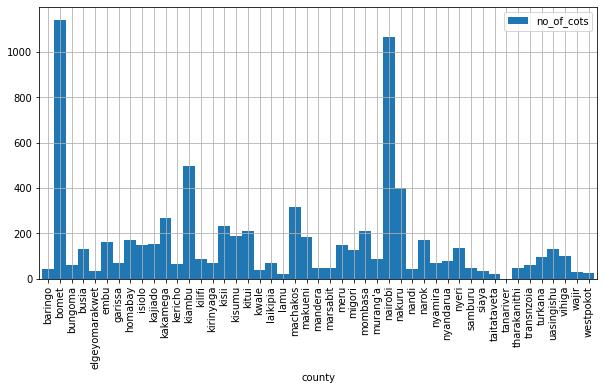

In [42]:
#number of cots
cots = hospitals.groupby(['county'], as_index=False)[['no_of_cots']].sum()
cots.sort_values(by='no_of_cots').head()
cots.plot.bar('county', 'no_of_cots', width=1, figsize=(10,5), grid=True)

ii.) Ratio of hospitals to population per county

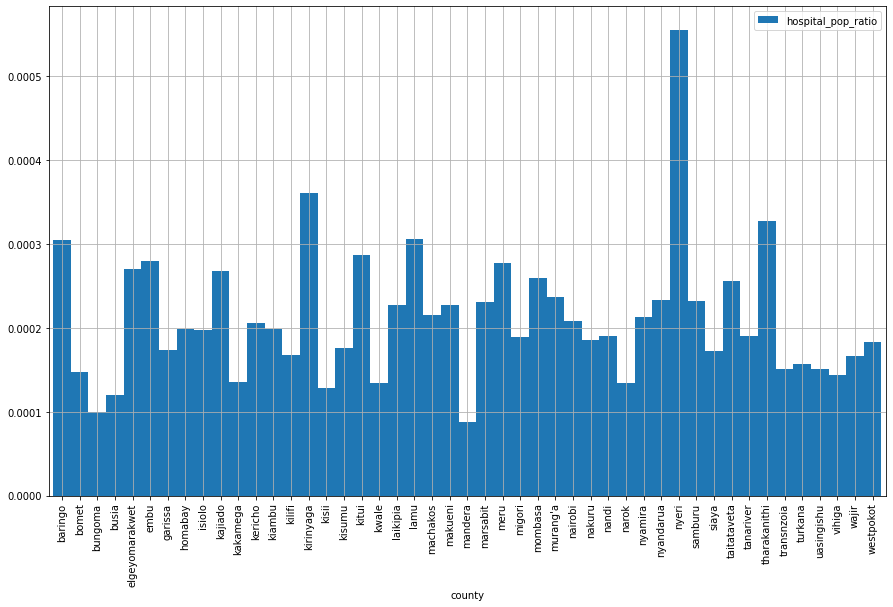

In [43]:
no_of_hospitals = hospitals.groupby(['county', 'total_population', 'core_health_workforce_per_10,000_population'], as_index=False)[['facility_code']].count()

no_of_hospitals.rename(columns={'facility_code': 'no_of_hospitals'}, inplace=True)

no_of_hospitals.sort_values(by='total_population', ascending=0)
no_of_hospitals['hospital_pop_ratio'] = no_of_hospitals['no_of_hospitals']*1.0/ no_of_hospitals['total_population']
no_of_hospitals.sort_values(by='hospital_pop_ratio', ascending=1).head()

no_of_hospitals.plot.bar('county', 'hospital_pop_ratio', width=1, figsize=(15,9), grid=True)


iii.) Find the county with lowest number of core_health_workforce_per_10,000_population.

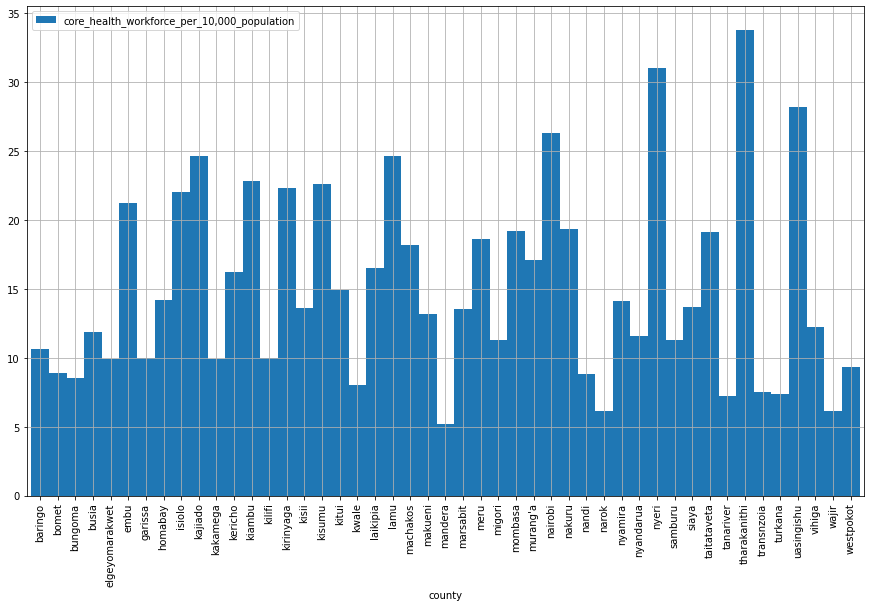

In [44]:
# Sort records by core_health_workforce_per_10,000_population

# Add the column core_health_workforce_per_10,000_population to the no_of_hospitals dataframe.
no_of_hospitals.sort_values(by='core_health_workforce_per_10,000_population', ascending=1).head()
no_of_hospitals.plot.bar('county', 'core_health_workforce_per_10,000_population', width=1, figsize=(15,9), grid=True)

The minimum number of healthworkforce as stated by WHO is a minimum of 4.45 healthworkers for 10000 population. This criteria has been met successfully with Mandera having the least ratio of 5.2. 

In [45]:
no_of_hospitals['healthworker_to_pop_ratio'] = 10000/ no_of_hospitals['core_health_workforce_per_10,000_population']
no_of_hospitals.sort_values(by='healthworker_to_pop_ratio', ascending=1).head()
no_of_hospitals[no_of_hospitals['healthworker_to_pop_ratio'] < 854.0].head()

,county,total_population,"core_health_workforce_per_10,000_population",no_of_hospitals,hospital_pop_ratio,healthworker_to_pop_ratio
3,busia,893681,11.9,107,0.000120,840.336134
5,embu,608599,21.2,170,0.000279,471.698113
7,homabay,1131950,14.2,225,0.000199,704.225352
8,isiolo,268002,22.0,53,0.000198,454.545455
9,kajiado,1117840,24.6,300,0.000268,406.504065


iv.) How many hospitals are open at night hours for emergencies per county?


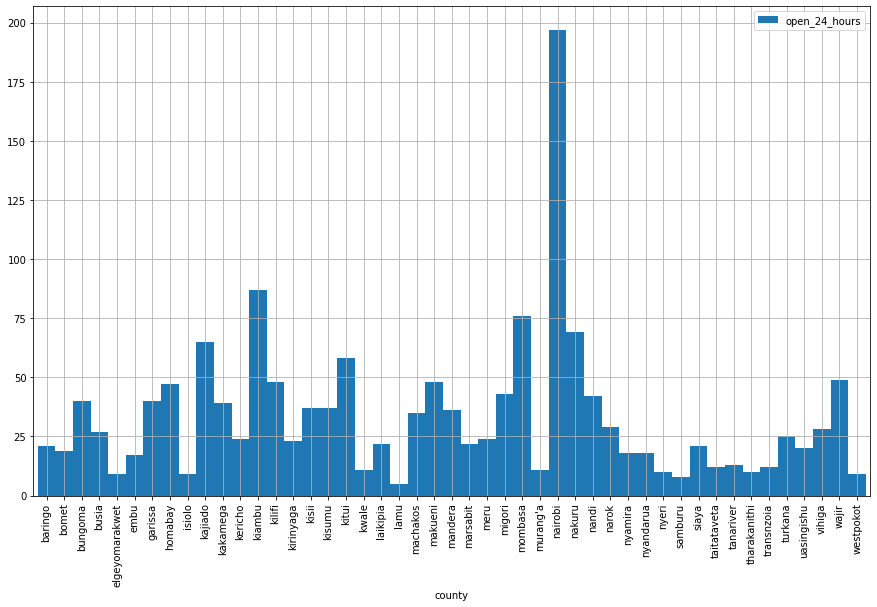

In [46]:
opened_24_hrs = hospitals[hospitals['open_24_hours'].map(lambda open_24_hours: 'Y' in open_24_hours)]
opened_24_hrs = opened_24_hrs.groupby(['county', 'total_population'], as_index=False)[['open_24_hours']].count()
opened_24_hrs.sort_values(by='open_24_hours', ascending=1).head()
opened_24_hrs.plot.bar('county', 'open_24_hours', width=1, figsize=(15,9), grid=True)

Nairobi has the largest number of hospitals opening 24hrs. Lamu has the least number of hospitals that can attend to night emergencies.

v.) Determining the number of ICU beds per county.

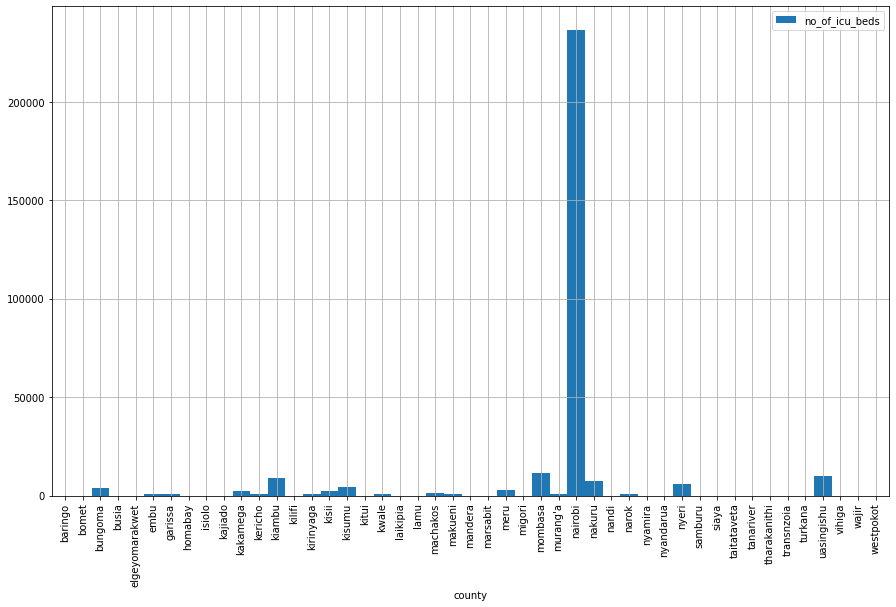

In [47]:

hospitals_icu_beds = hospitals.groupby(['county'], as_index=False)[['no_of_icu_beds']].sum()
hospitals_icu_beds.plot.bar('county', 'no_of_icu_beds', width=1, figsize=(15,9), grid=True)

In [48]:
# counties with no icu beds
hospitals_icu_beds.loc[hospitals_icu_beds['no_of_icu_beds'] != 0, ['county', 'no_of_icu_beds']]

,county,no_of_icu_beds
2,bungoma,3818.0
5,embu,850.0
6,garissa,876.0
10,kakamega,2286.0
11,kericho,930.0
12,kiambu,9120.0
14,kirinyaga,880.0
15,kisii,2106.0
16,kisumu,4263.0
18,kwale,696.0


Very few hospitals countrywide offer icu services. Nairobi has the highest number of ICU beds. Counties such as Mandera, Marsabit, Nyamira, Nyandarua , Siaya, Tana River, Turkana, Wajir and Vihiga had no icu services as of March 2020.

vi.) How many (in)patients can be admitted when the hospital is at full capacity per county?

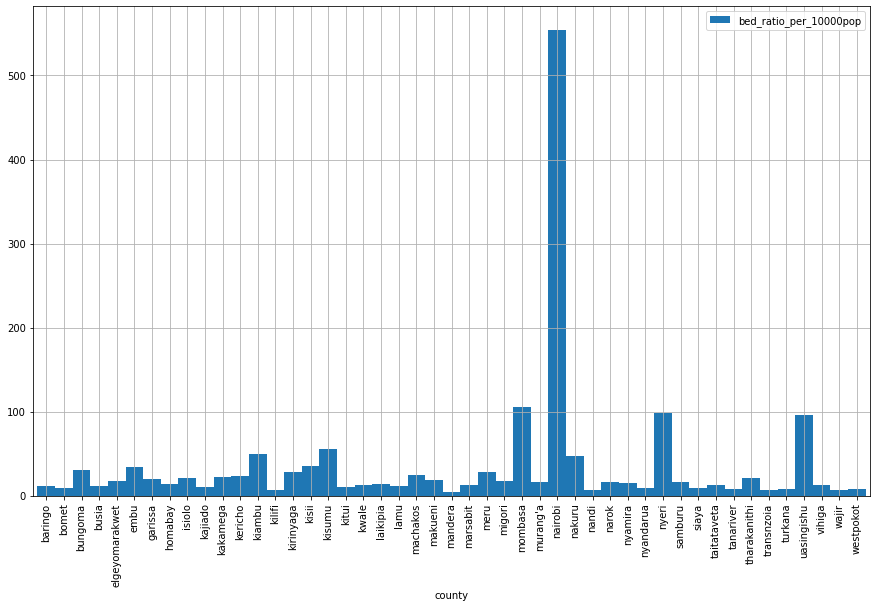

In [49]:
hospitals['total_beds'] = hospitals['no_of_icu_beds'] + hospitals['no_of_beds']
hospitals_beds = hospitals.groupby(['county', 'total_population'], as_index=False)[['total_beds']].sum()
hospitals_beds.sort_values(by='total_beds', ascending=True).head()
hospitals_beds['bed_ratio_per_10000pop'] = hospitals_beds['total_beds'] * 10000 * 1.0/ hospitals_beds['total_population']
hospitals_beds.sort_values(by='bed_ratio_per_10000pop', ascending=True).head()
hospitals_below_threshold =hospitals_beds[hospitals_beds['bed_ratio_per_10000pop'] < 20 ]
hospitals_below_threshold.sort_values(by='bed_ratio_per_10000pop', ascending=1)

hospitals_beds.plot.bar('county', 'bed_ratio_per_10000pop', width=1, figsize=(15,9), grid=True)


<b>Mandera, Kilfi, Wajir, Nandi, Tan River, Turkana, Siaya, Nyandarua, Bomet, Kitui, Baringo, Lamu, Kajiado, Busia, Marsabit, Vihiga, Kwale, Laikipia, Nyamira, Migori and Narok</b> counties lie below the accpetable standard of 20 beds per 10000 population. Mandera has the list ratio of 5.106881.

vi.) The percentage (%) of private and government owned hospitals per county.

In [50]:
# Finding the percentage of government hospitals versus private hospitals in the whole country
hospitals_types = pd.DataFrame()
gvt = hospitals[(hospitals['owner'] == 'Ministry of Health') | 
                (hospitals['owner'] == 'Local Authority T Fund') | 
                (hospitals['owner'] == 'Community Development Fund') |
                (hospitals['owner'] == 'Local Authority')]

priv = hospitals[(hospitals['owner'] != 'Ministry of Health') & 
                (hospitals['owner'] != 'Local Authority T Fund') & 
                (hospitals['owner'] != 'Community Development Fund') &
                (hospitals['owner'] != 'Local Authority')]


gvt_count = gvt['owner'].value_counts()
# print the counts
print(gvt_count)
priv_count = priv['owner'].value_counts()
# print the counts
print(priv_count)

Ministry of Health            4138
Local Authority                104
Community Development Fund      30
Local Authority T Fund           3
Name: owner, dtype: int64
Private Enterprise (Institution)                   1252
Private Practice - Nurse / Midwife                  947
Private Practice - Clinical Officer                 585
Private Practice - General Practitioner             421
Kenya Episcopal Conference-Catholic Secretariat     397
Christian Health Association of Kenya               364
Non-Governmental Organizations                      335
Other Faith Based                                   261
Private Practice - Unspecified                      230
Private Practice - Medical Specialist               164
Company Medical Service                              85
Community                                            71
Other Public Institution                             65
Academic (if registered)                             35
Armed Forces                                      

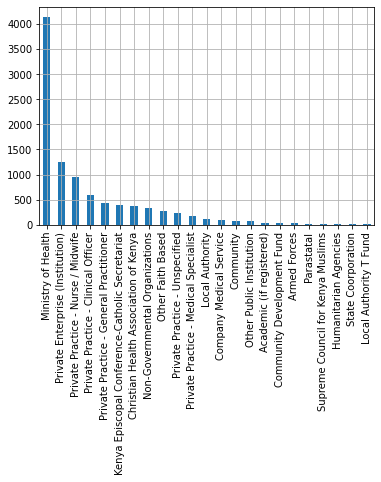

In [52]:
# Visualize all types of hospitals on graph
hos_types = hospitals['owner'].value_counts()
hos_types.plot.bar(grid=True)

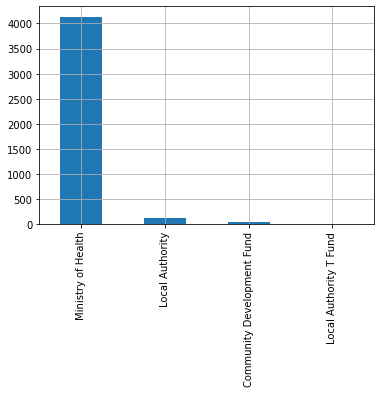

In [53]:
# visualize types of government hospitals on a bar graph.
gvt_count.plot.bar(grid=True)
# print the counts
#print(gvt_count)


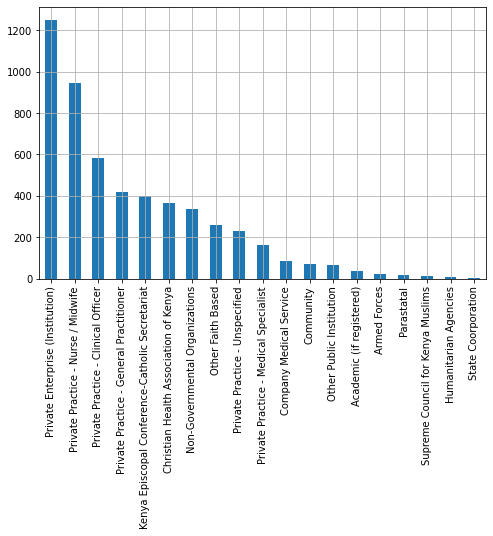

In [54]:
priv_count.plot.bar(figsize=(8,5), grid=True)

In [55]:
# To find the percentage (%) of private and government owned hospitals per county.
total_facilities = hospitals.groupby(['county','core_health_workforce_per_10,000_population','total_population'],
                                     as_index=False)[['facility_code']].count()
total_facilities.head()

# Rename facility_code column to no_of_hospitals
total_facilities.rename(columns={'facility_code':'total_hospitals'}, inplace=True)  

# convert no of hospitlas to int
total_facilities['total_hospitals'] =  total_facilities['total_hospitals'].astype(int)  


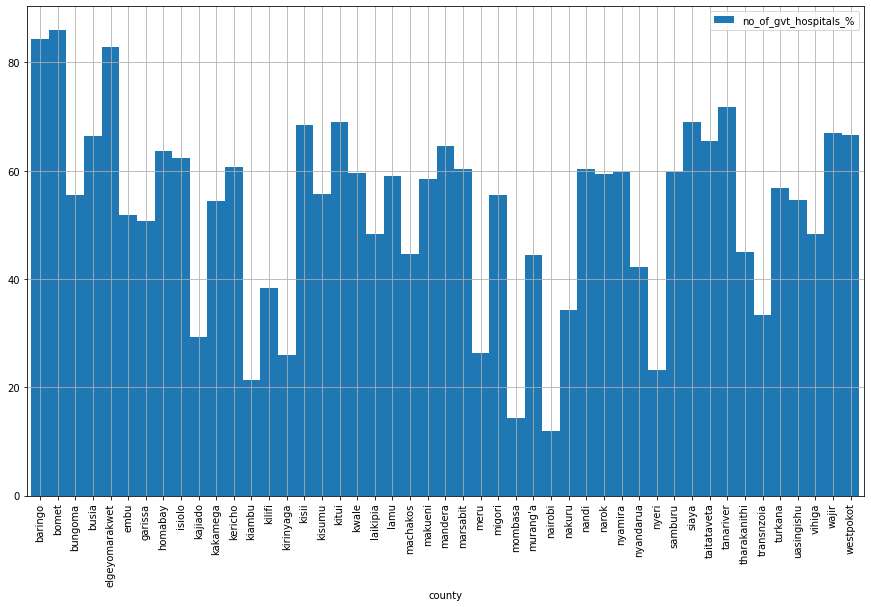

In [56]:
# count hospitals for each county
total_gvt = gvt.groupby(['county', 'total_population','core_health_workforce_per_10,000_population'],
                        as_index=False)[['facility_name']].count()
# Rename facility_name column to no_of_hospitals
total_gvt.rename(columns={'facility_name':'no_of_hospitals'}, inplace=True)                        
total_gvt['no_of_hospitals'] = total_gvt['no_of_hospitals'].astype(int) 

total_facilities['no_of_gvt_hospitals_%']  = (
   total_gvt['no_of_hospitals'] * 1.0/total_facilities['total_hospitals']) * 100
total_facilities['private_hospitals_%'] = 100 -  total_facilities['no_of_gvt_hospitals_%']   
total_facilities.sort_values(by='no_of_gvt_hospitals_%', ascending=1).head()

total_facilities.plot.bar('county', 'no_of_gvt_hospitals_%', width=1, figsize=(15,9), grid=True)

Only 5.9% of the hospitals in Nairobi are government hospitals. Government hospitals offer free medical services with only a small charge which is more affordable to the public compared to private hospitals:
Private hospital inpatient fees averages at 9500/- while public hospital inpatient fees averages at 
4000/-. 
Private hospitals ICU charges averages at 30k while public hospital ICU charges averages at  
Maternal charges for private hospitals averages at 200k. 

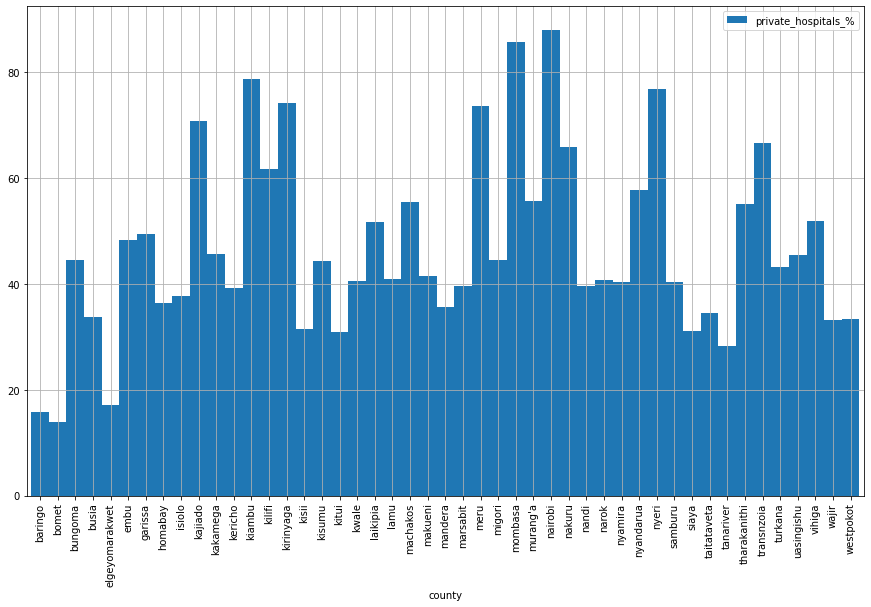

In [57]:
# Find hospital with lowest number of government hospitals
total_facilities.plot.bar('county', 'private_hospitals_%', width=1, figsize=(15,9), grid=True)

Lamu, Isiolo, Tana River, Mandera and Vihiga have less than 100 hospitals despite having a population of more than 100000. Moreover, there are few healthworkers in each hospital. This implies that the ratio of health workers to the total population is also small. 

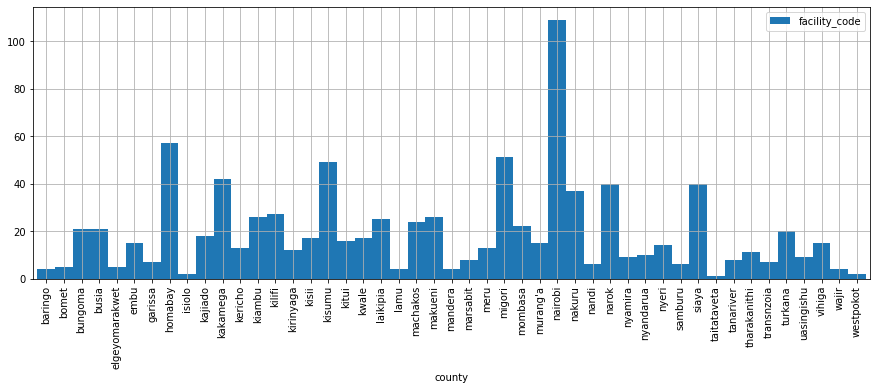

In [58]:
# number of antiretroviral therapy per county
art_ = hospitals[(hospitals['art']=='Y') & (hospitals['operational_status']=='Operational')]
art_ = art_.groupby('county',as_index=False)['facility_code'].count()
art_.sort_values(by='facility_code', ascending=1).head()
art_.plot.bar(x='county', y='facility_code', width=1, figsize=(15,5), grid=True)

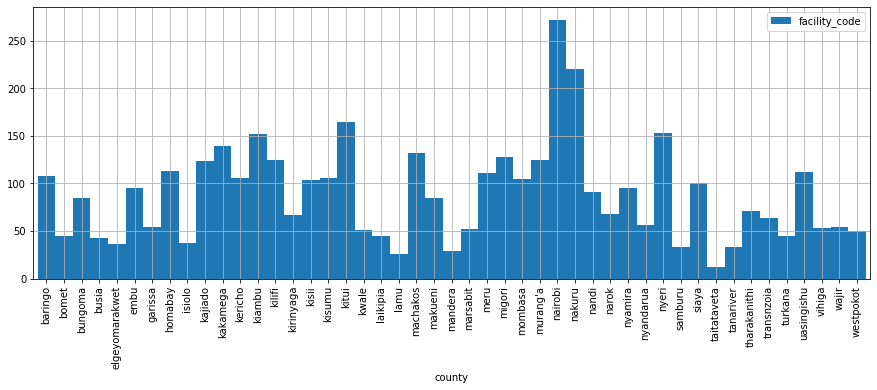

In [59]:
# number of family practitioners per county
fp_= hospitals[(hospitals['fp']=='Y') & (hospitals['operational_status']=='Operational')]
fp_ = fp_.groupby('county',as_index=False)['facility_code'].count()
fp_.sort_values(by='facility_code', ascending=1).head()
fp_.plot.bar(x='county', y='facility_code', width=1, figsize=(15,5), grid=True)

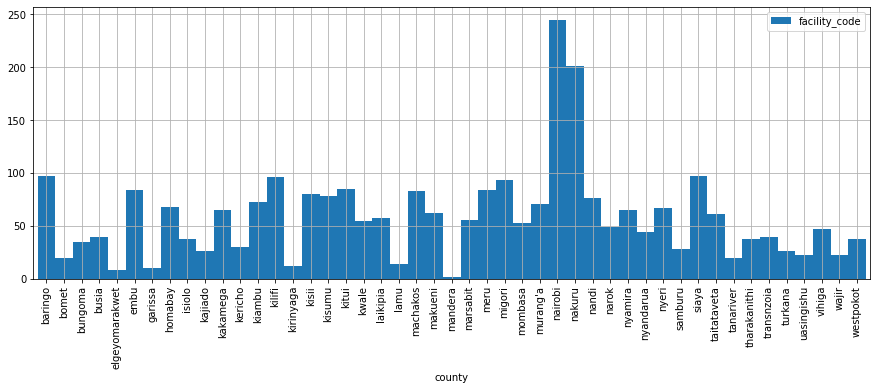

In [60]:
# number of haemoglobin testing per county
hbc_= hospitals[(hospitals['hbc']=='Y') & (hospitals['operational_status']=='Operational')]
hbc_ = hbc_.groupby('county',as_index=False)['facility_code'].count()
hbc_.sort_values(by='facility_code', ascending=1).head()
hbc_.plot.bar('county', 'facility_code', width=1, figsize=(15,5), grid=True)

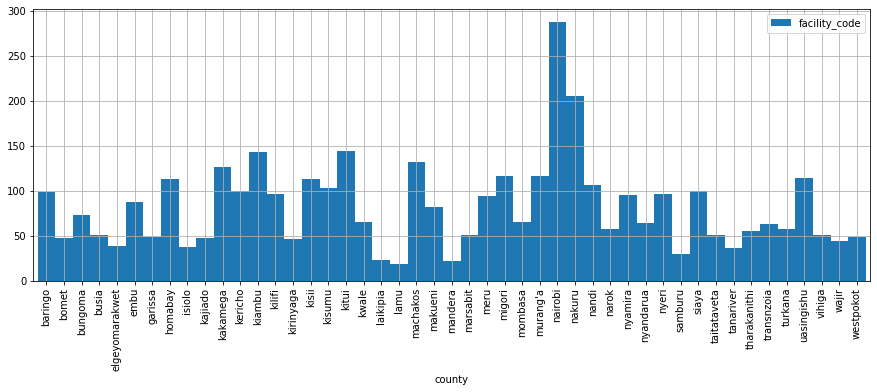

In [61]:
# number of intermmitent peritoneal dialysis per county
ipd_= hospitals[(hospitals['ipd']=='Y') & (hospitals['operational_status']=='Operational')]
ipd_ = ipd_.groupby('county',as_index=False)['facility_code'].count()
ipd_.sort_values(by='facility_code', ascending=1).head().head()
ipd_.plot.bar('county', 'facility_code', width=1, figsize=(15,5), grid=True)

Nairobi county has the highest number of resources.